This notebook is referenced from [Bernstein-Vazirani Algorithm — Programming on Quantum Computers Season 1 Ep 6](https://www.youtube.com/watch?v=sqJIpHYl7oo&list=PLOFEBzvs-Vvp2xg9-POLJhQwtVktlYGbY&index=6)

In [1]:
from qiskit import *

qiskit.__qiskit_version__

{'qiskit-terra': '0.17.4', 'qiskit-aer': '0.8.2', 'qiskit-ignis': '0.6.0', 'qiskit-ibmq-provider': '0.14.0', 'qiskit-aqua': '0.9.2', 'qiskit': '0.27.0', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

In [2]:
secret_number = "101001"
num_number = len(secret_number)

# Black box function or Oracle

{'0000000': 1024}


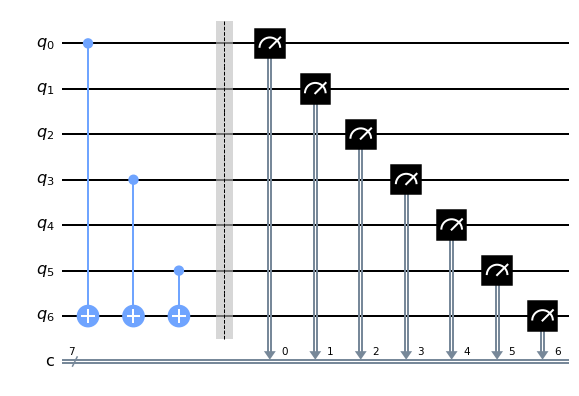

In [3]:
circuit = QuantumCircuit(num_number + 1, num_number + 1)

for ii, yesno in enumerate(reversed(secret_number)):
    if yesno == "1":
        circuit.cx(ii, num_number)
circuit.barrier()

circuit.measure(range(num_number + 1), range(num_number + 1))
_ = circuit.draw()

simulator = Aer.get_backend("qasm_simulator")
result = execute(circuit, backend=simulator, shots=1024).result()
counts = result.get_counts()
print(counts)

{'1000001': 1024}


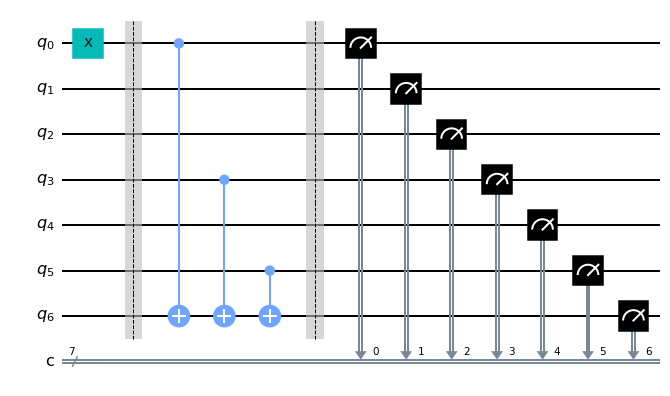

In [4]:
circuit = QuantumCircuit(num_number + 1, num_number + 1)

circuit.x(0)
circuit.barrier()

for ii, yesno in enumerate(reversed(secret_number)):
    if yesno == "1":
        circuit.cx(ii, num_number)
circuit.barrier()

circuit.measure(range(num_number + 1), range(num_number + 1))
_ = circuit.draw()

simulator = Aer.get_backend("qasm_simulator")
result = execute(circuit, backend=simulator, shots=1024).result()
counts = result.get_counts()
print(counts)

{'0001101': 1024}


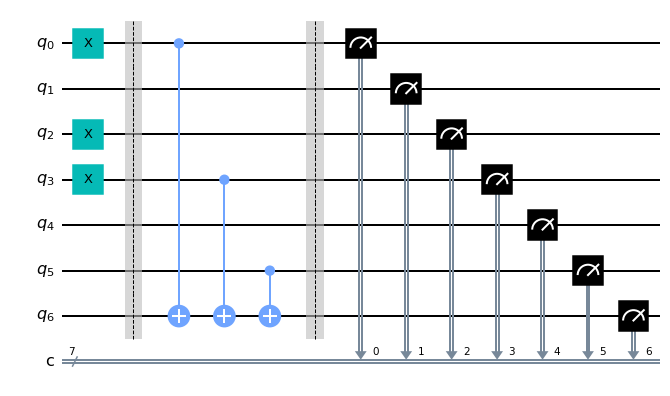

In [5]:
circuit = QuantumCircuit(num_number + 1, num_number + 1)

circuit.x([0, 2, 3])
circuit.barrier()

for ii, yesno in enumerate(reversed(secret_number)):
    if yesno == "1":
        circuit.cx(ii, num_number)
circuit.barrier()

circuit.measure(range(num_number + 1), range(num_number + 1))
_ = circuit.draw()

simulator = Aer.get_backend("qasm_simulator")
result = execute(circuit, backend=simulator, shots=1024).result()
counts = result.get_counts()
print(counts)

# Bernstein-Vazirani Algorithm

{'101001': 1}


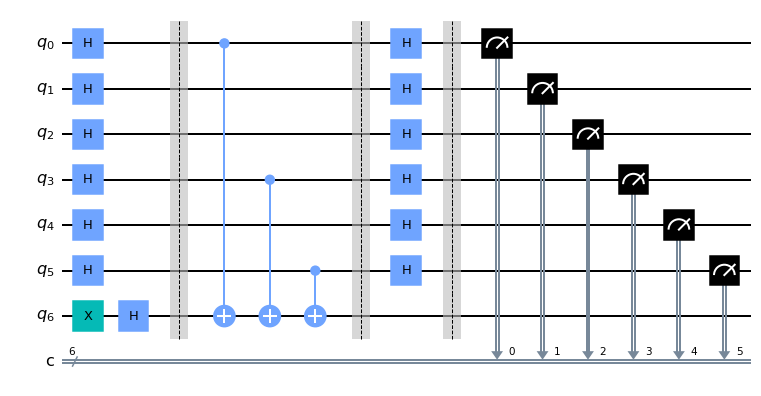

In [6]:
circuit = QuantumCircuit(num_number + 1, num_number)

circuit.h(range(num_number))
circuit.x(num_number)
circuit.h(num_number)
circuit.barrier()

# black box
for ii, yesno in enumerate(reversed(secret_number)):
    if yesno == "1":
        circuit.cx(ii, num_number)
circuit.barrier()

circuit.h(range(num_number))
circuit.barrier()

circuit.measure(range(num_number), range(num_number))
_ = circuit.draw()

simulator = Aer.get_backend("qasm_simulator")
result = execute(circuit, backend=simulator, shots=1).result()
counts = result.get_counts()
print(counts)